<a href="https://colab.research.google.com/github/dcthyun0308/ESAA/blob/main/YB2%EC%A1%B0_miniproject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 25-2 YB 2조 미니프로젝트2

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
smpl_sub = pd.read_csv('sample_submission.csv')

#**데이터 전처리**

In [53]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [54]:
test.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


* index 구분자
* quality 품질
* fixed acidity 산도
* volatile acidity 휘발성산
* citric acid 시트르산
* residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분
* chlorides 염화물
* free sulfur dioxide 독립 이산화황
* total sulfur dioxide 총 이산화황
* density 밀도
* pH 수소이온농도
* sulphates 황산염
* alcohol 도수
* type 종류

In [55]:
# 불필요한 피처(index) 제거
train.drop(['index'], axis=1, inplace=True)
test.drop(['index'], axis=1, inplace=True)

In [56]:
train.shape, test.shape

((5497, 13), (1000, 12))

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5497 non-null   int64  
 1   fixed acidity         5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   citric acid           5497 non-null   float64
 4   residual sugar        5497 non-null   float64
 5   chlorides             5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   density               5497 non-null   float64
 9   pH                    5497 non-null   float64
 10  sulphates             5497 non-null   float64
 11  alcohol               5497 non-null   float64
 12  type                  5497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 558.4+ KB


5497개 데이터, 결측치 없음

In [58]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1000 non-null   float64
 1   volatile acidity      1000 non-null   float64
 2   citric acid           1000 non-null   float64
 3   residual sugar        1000 non-null   float64
 4   chlorides             1000 non-null   float64
 5   free sulfur dioxide   1000 non-null   float64
 6   total sulfur dioxide  1000 non-null   float64
 7   density               1000 non-null   float64
 8   pH                    1000 non-null   float64
 9   sulphates             1000 non-null   float64
 10  alcohol               1000 non-null   float64
 11  type                  1000 non-null   object 
dtypes: float64(11), object(1)
memory usage: 93.9+ KB


결측치 없음

In [59]:
# 라벨인코딩: type

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

train['type']=le.fit_transform(train['type'])
test['type']=le.fit_transform(test['type'])

In [60]:
train.head()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1


red는 0, white는 1로 type 피처 변수 잘 변경됨.

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5497 non-null   int64  
 1   fixed acidity         5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   citric acid           5497 non-null   float64
 4   residual sugar        5497 non-null   float64
 5   chlorides             5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   density               5497 non-null   float64
 9   pH                    5497 non-null   float64
 10  sulphates             5497 non-null   float64
 11  alcohol               5497 non-null   float64
 12  type                  5497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 558.4 KB


#**EDA**

## quality 변수 분석
자료 예측의 핵심 변수인 'quality'피처 먼저 분석.

품질 등급별 개수:
 quality
3      26
4     186
5    1788
6    2416
7     924
8     152
9       5
Name: count, dtype: int64


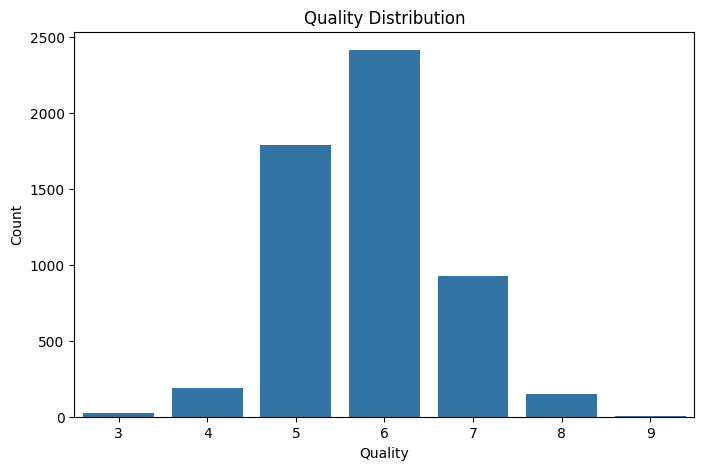

In [62]:
print("품질 등급별 개수:\n", train['quality'].value_counts().sort_index())

plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=train)
plt.title('Quality Distribution')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

등급이 3~9까지 존재.  
대부분의 데이터가 5,6,7에 몰려있음. 3,9등급은 상대적으로 매우 적음.  
-> 추후 데이터 분리시 불균형 조심해야함.


## 변수별 분석

변수: 화학성분 11가지(연속형), 와인 type(카테고리형) 이므로 따로 분석함.

### 연속형 피처 분석


기술 통계량:
                        count        mean        std      min      25%  \
quality               5497.0    5.818992   0.870311  3.00000   5.0000   
fixed acidity         5497.0    7.210115   1.287579  3.80000   6.4000   
volatile acidity      5497.0    0.338163   0.163224  0.08000   0.2300   
citric acid           5497.0    0.318543   0.145104  0.00000   0.2500   
residual sugar        5497.0    5.438075   4.756676  0.60000   1.8000   
chlorides             5497.0    0.055808   0.034653  0.00900   0.0380   
free sulfur dioxide   5497.0   30.417682  17.673881  1.00000  17.0000   
total sulfur dioxide  5497.0  115.566491  56.288223  6.00000  78.0000   
density               5497.0    0.994673   0.003014  0.98711   0.9923   
pH                    5497.0    3.219502   0.160713  2.74000   3.1100   
sulphates             5497.0    0.530524   0.149396  0.22000   0.4300   
alcohol               5497.0   10.504918   1.194524  8.00000   9.5000   

                           50%        75

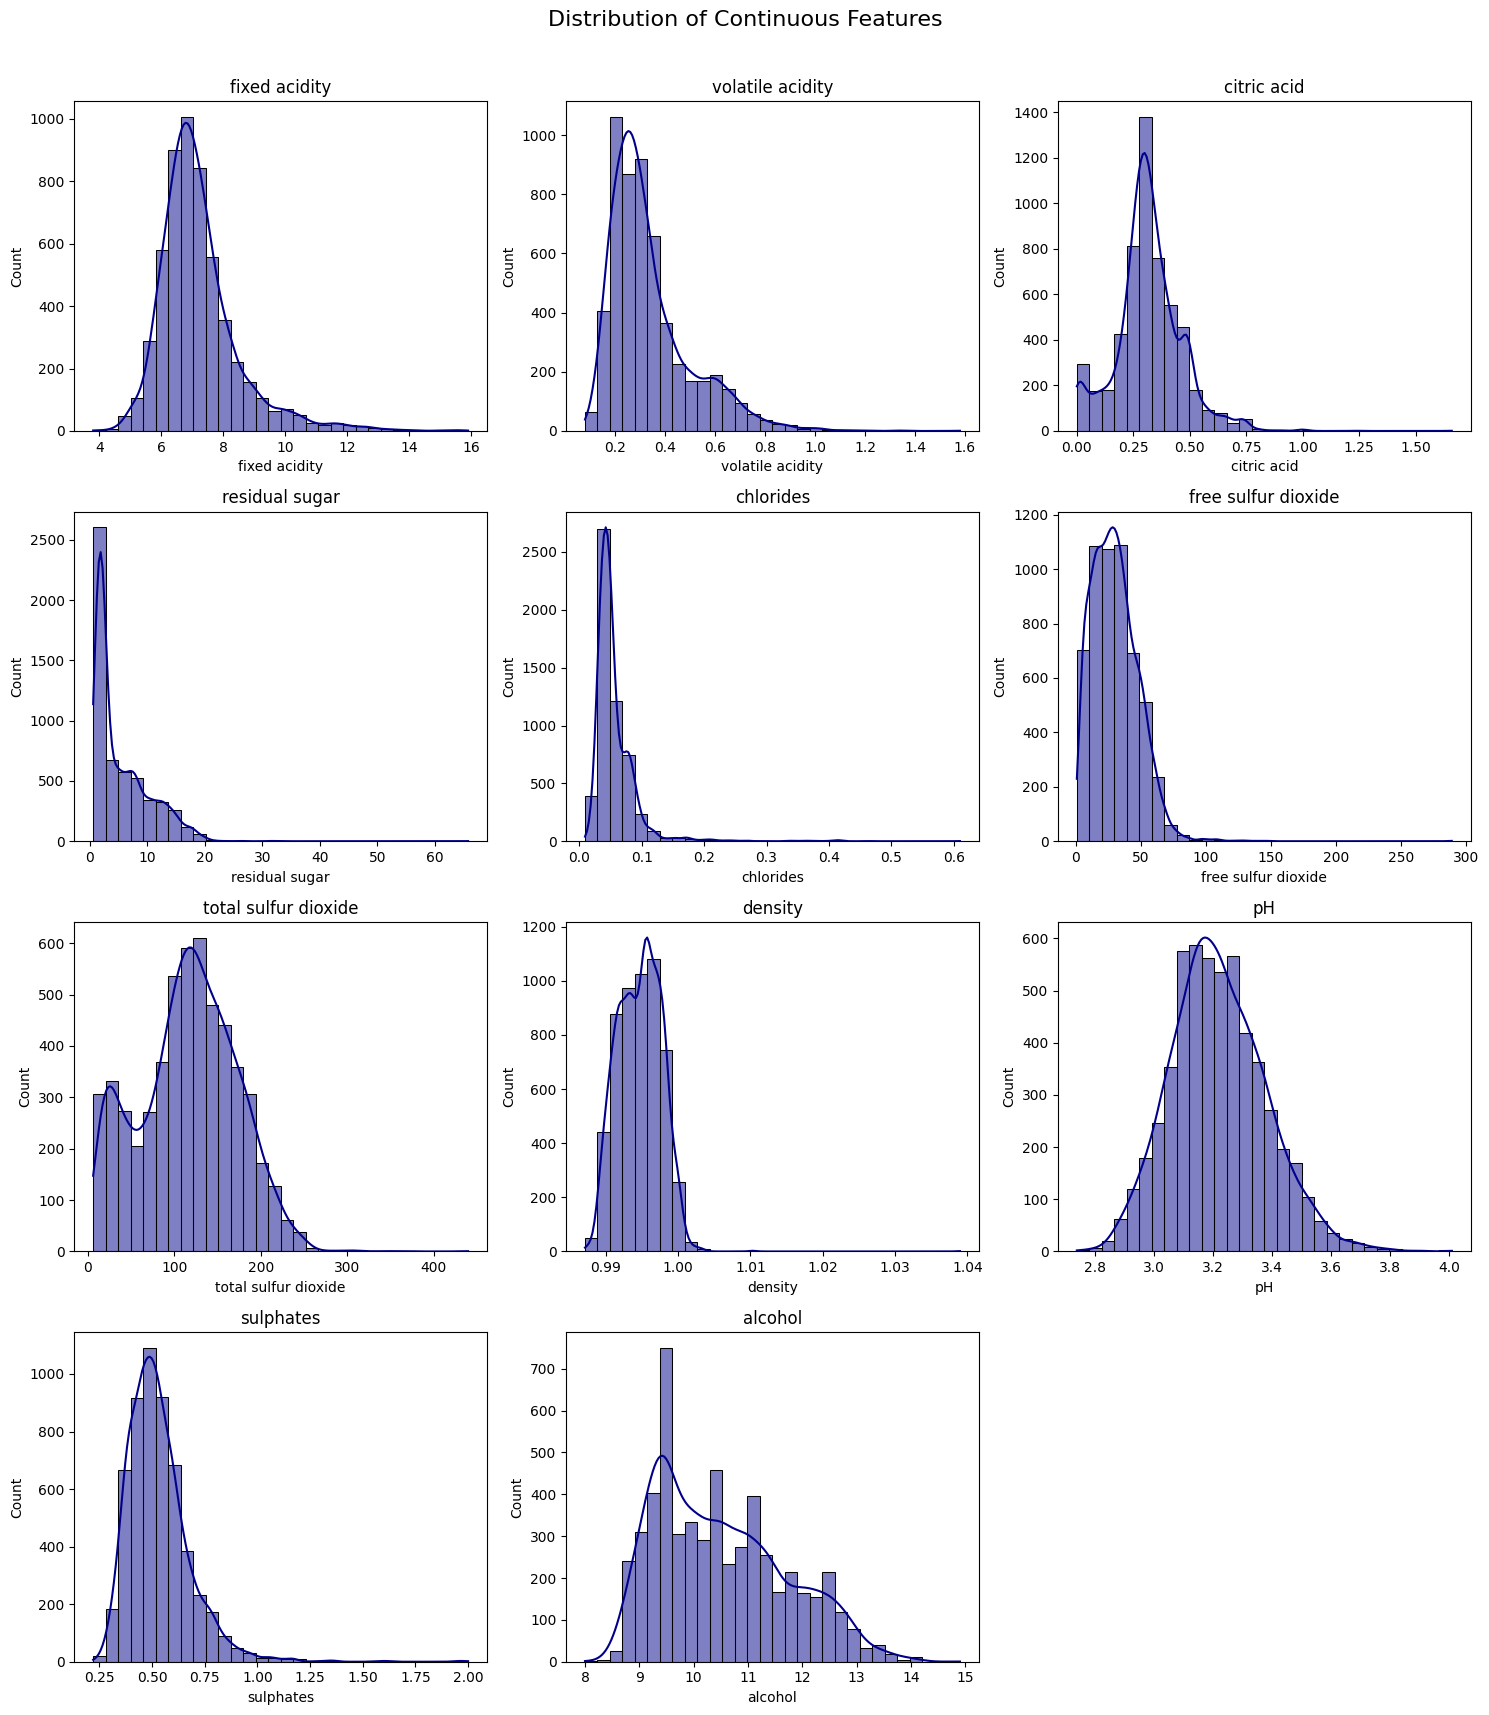

In [63]:
print("\n기술 통계량:\n", train.drop(columns=['type']).describe().T)

# 연속형 피처 (화학 성분) 리스트만 따로 추출
continuous_features = train.columns.drop(['quality', 'type'])

# 연속형 피처 분포 (히스토그램)
fig, axes = plt.subplots(4, 3, figsize=(15, 18))
axes = axes.flatten()

for i, col in enumerate(continuous_features):
    sns.histplot(train[col], kde=True, ax=axes[i], bins=30, color='darkblue')
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)

# 마지막 비어있는 subplot 제거
if len(continuous_features) < len(axes):
    for j in range(len(continuous_features), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Distribution of Continuous Features', fontsize=16)
plt.show()

'residual sugar', 'chlorides' : 왼쪽에 대부분의 값이 위치하고, 오른쪽에 긴 꼬리를 가지는 분포 가짐.

'free sugar dioxide', 'density', 'sulphates' : 왼쪽에 많은 수의 자료가 집중되어있고, 비대칭적인 분포를 가짐.

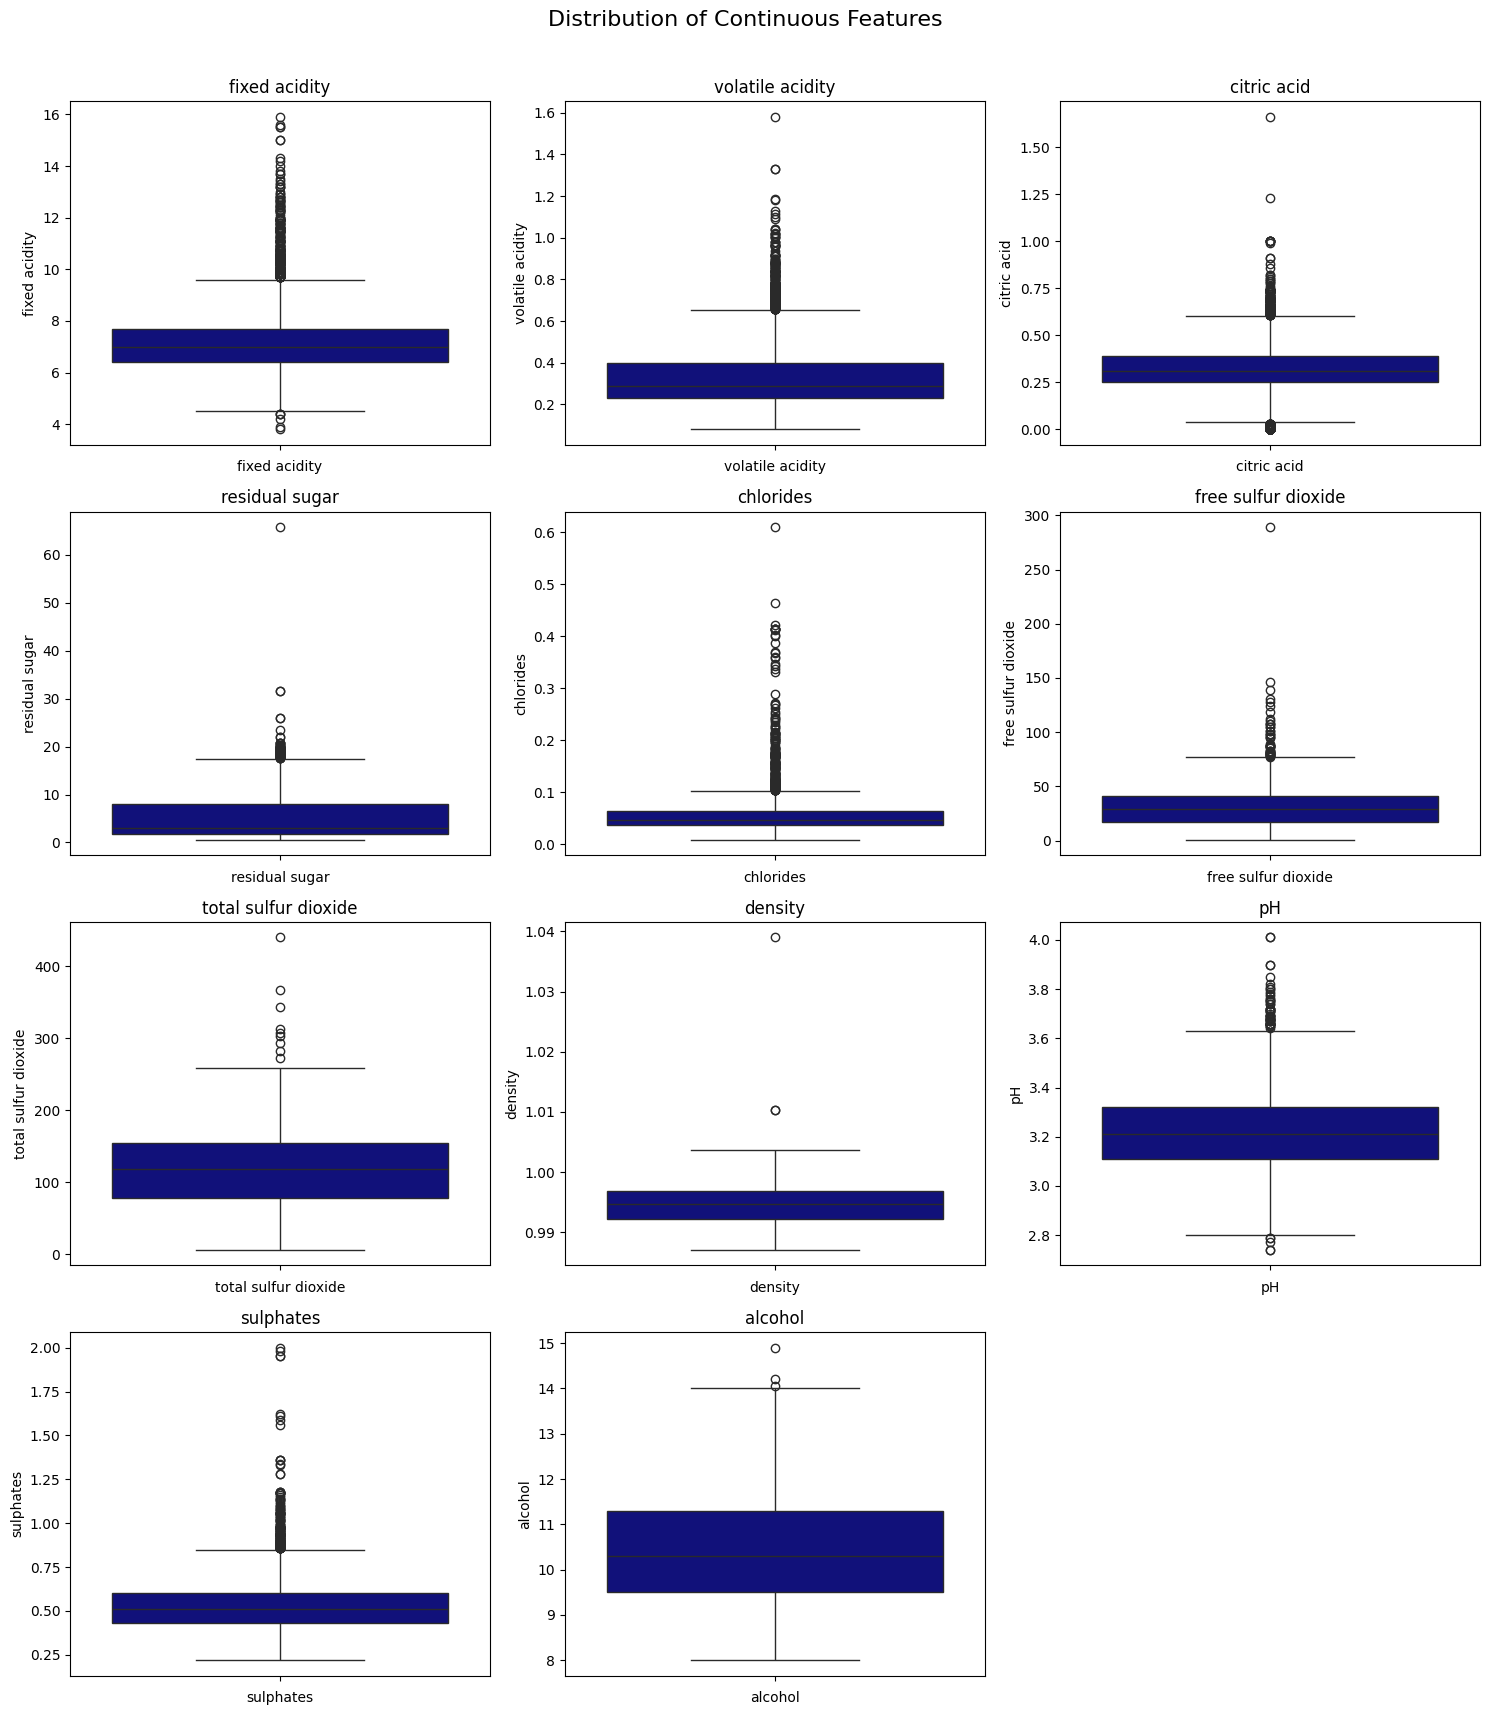

In [64]:
# 연속형 피처 분포 (박스플롯)
fig, axes = plt.subplots(4, 3, figsize=(15, 18))
axes = axes.flatten()

for i, col in enumerate(continuous_features):
    sns.boxplot(train[col], ax=axes[i], color='darkblue')
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)

# 마지막 비어있는 subplot 제거
if len(continuous_features) < len(axes):
    for j in range(len(continuous_features), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Distribution of Continuous Features', fontsize=16)
plt.show()

box plot으로 이상치 가능성 확인함.  

fixed acidity, volatile acidity, chlorides, sulphates, free sugar dioxide 피처에 이상치 뚜렷하게 많이 존재함.

#### 왜도 계산
이상치 처리 판단을 위해 왜도 분석 진행함.


In [65]:
from scipy.stats import skew

# 왜도 계산
skew_values = train[continuous_features].apply(lambda x: skew(x.dropna()))
skew_df = pd.DataFrame({'Feature': skew_values.index, 'Skewness': skew_values.values})

# 절대값이 1 이상인 피처 (강한 비대칭)
highly_skewed = skew_df[abs(skew_df['Skewness']) >= 1].sort_values(by='Skewness', ascending=False)
moderately_skewed = skew_df[(abs(skew_df['Skewness']) >= 0.5) & (abs(skew_df['Skewness']) < 1)].sort_values(by='Skewness', ascending=False)


print("\n[강한 비대칭 (절대값 >= 1.0) - 로그 변환 고려 대상]")
print(highly_skewed.to_string(index=False))

print("\n[중간 비대칭 (0.5 <= 절대값 < 1.0) - 변환 고려 가능]")
print(moderately_skewed.to_string(index=False))


[강한 비대칭 (절대값 >= 1.0) - 로그 변환 고려 대상]
            Feature  Skewness
          chlorides  5.185911
          sulphates  1.914956
      fixed acidity  1.710430
     residual sugar  1.498545
   volatile acidity  1.497435
free sulfur dioxide  1.310273

[중간 비대칭 (0.5 <= 절대값 < 1.0) - 변환 고려 가능]
Feature  Skewness
density  0.603954
alcohol  0.553447


box plot에서 분석한 것과 같이, chlorides에서 심한 왜도 가짐.  
sulphates, fixed acidity, residual sugar, volatile acidity,  free sugar dioxide에서도 1 이상의 왜도 가짐.

다만 Decision Tree, Random Forest, LightGBM, XGBoost는 모두 트리 기반 앙상블 모델이므로 데이터의 분할에 의존함. 이상치에 크게 좌우되지 않는 모델임.

-> 5 이상의 왜도 가지는 chlorides 피처에 Box-Cox 변환 적용해 이상치 처리 진행.

### 카테고리형 피처 분석

와인 종류별 개수:
 type
0    1338
1    4159
Name: count, dtype: int64


/tmp/ipython-input-2628971131.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=train, palette=['firebrick', 'lightgrey'])


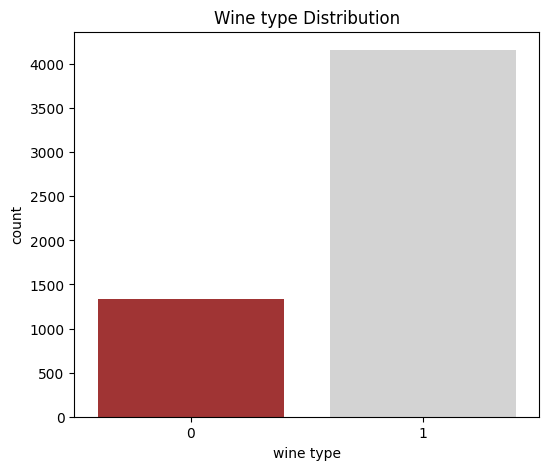

In [66]:
# 2-2. 와인 유형 (type) 분포

print("와인 종류별 개수:\n", train['type'].value_counts().sort_index())

plt.figure(figsize=(6, 5))
sns.countplot(x='type', data=train, palette=['firebrick', 'lightgrey'])
plt.title('Wine type Distribution')
plt.xlabel('wine type')
plt.ylabel('count')
plt.show()

1(white) 와인 수가 0(red)의 거의 3배임.
와인 타입이 품질에 큰 영향을 미치는지 사전 판단 필요함.

## 변수 간 관계 분석

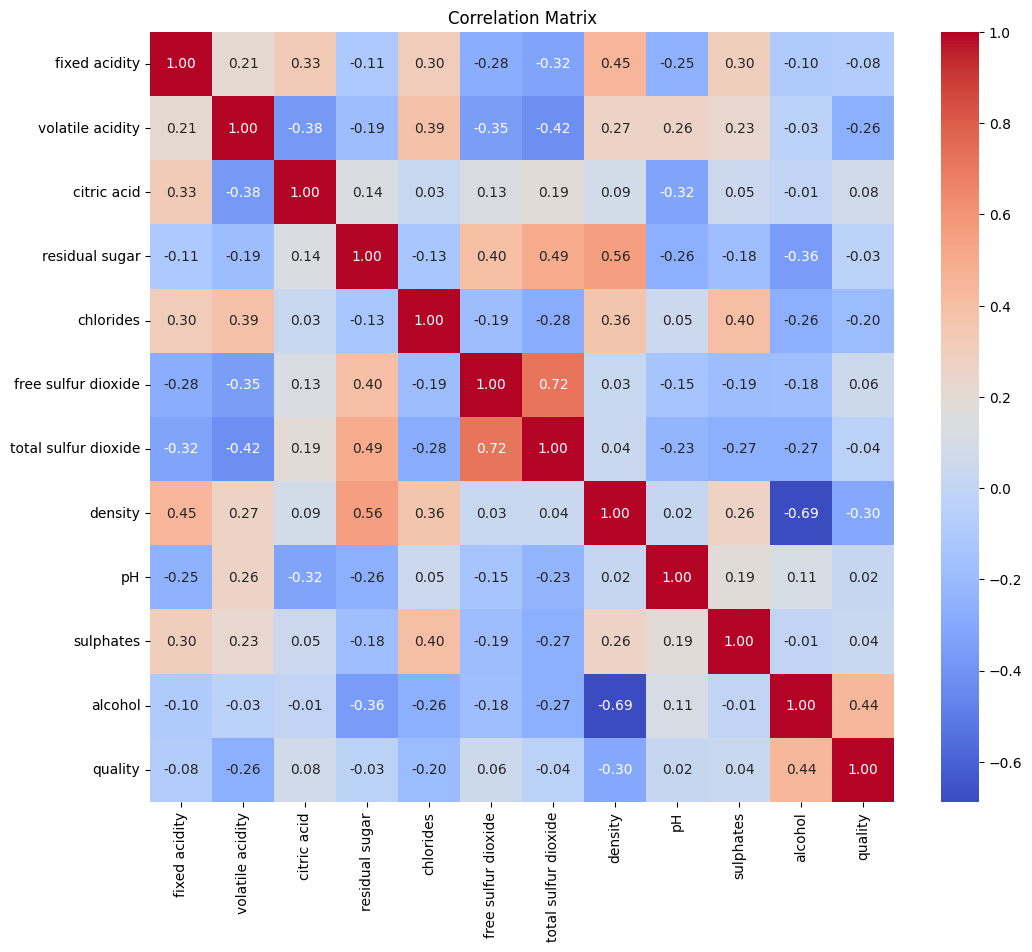


quality와의 상관관계 (절대값 순):
quality                 1.000000
alcohol                 0.439615
citric acid             0.079157
free sulfur dioxide     0.055574
sulphates               0.042068
pH                      0.017931
residual sugar         -0.032848
total sulfur dioxide   -0.039732
fixed acidity          -0.076506
chlorides              -0.198148
volatile acidity       -0.261557
density                -0.299831
Name: quality, dtype: float64


In [67]:
# 피처 간 상관관계 Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = train[continuous_features.tolist() + ['quality']].corr() # 화학 성분 자료에 품질 피처 추가, 상관관계에 type 분석은 제외
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

print("\nquality와의 상관관계 (절대값 순):")
print(correlation_matrix['quality'].sort_values(ascending=False))

#### 피처와 타켓 변수 간의 관계 파악
quality와 가장 높은 상관관계를 가지는 피처는 alcohol이지만, 0.5 이하의 낮은 값을 가짐.  
그 외의 화학성분들도 품질과 뚜렷한 상관관계를 보이지는 않음.
- alcohol: 0.44, 약한 양의 선형 관계
- density : -0.30, 약한 음의 선형 관계
- volatile acidity : -0.26, 약한 음의 선형 관계


#### 피처간의 관계 파악
다중 공선성 파악 위해 피처간 높은 상관관계가 있는지 확인.  
- total sulfur dioxide & free sulfur dioxide: 0.72  
- density & residual sugar : 0.56  
- total sulfur dioxide & residual sugar : 0.49
- density & fixed acidity : 0.45
- quality & alcohol : 0.44
- free sulfur dioxide & residual sugar : 0.40
- alcohol & density : -0.69

전체적으로 0.8 이상의 높은 상관관계를 가지지는 않으므로, 현재 피처 그대로 유지.

/tmp/ipython-input-2456103410.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=train, ax=axes[i], palette='Pastel1')
/tmp/ipython-input-2456103410.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=train, ax=axes[i], palette='Pastel1')
/tmp/ipython-input-2456103410.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=train, ax=axes[i], palette='Pastel1')


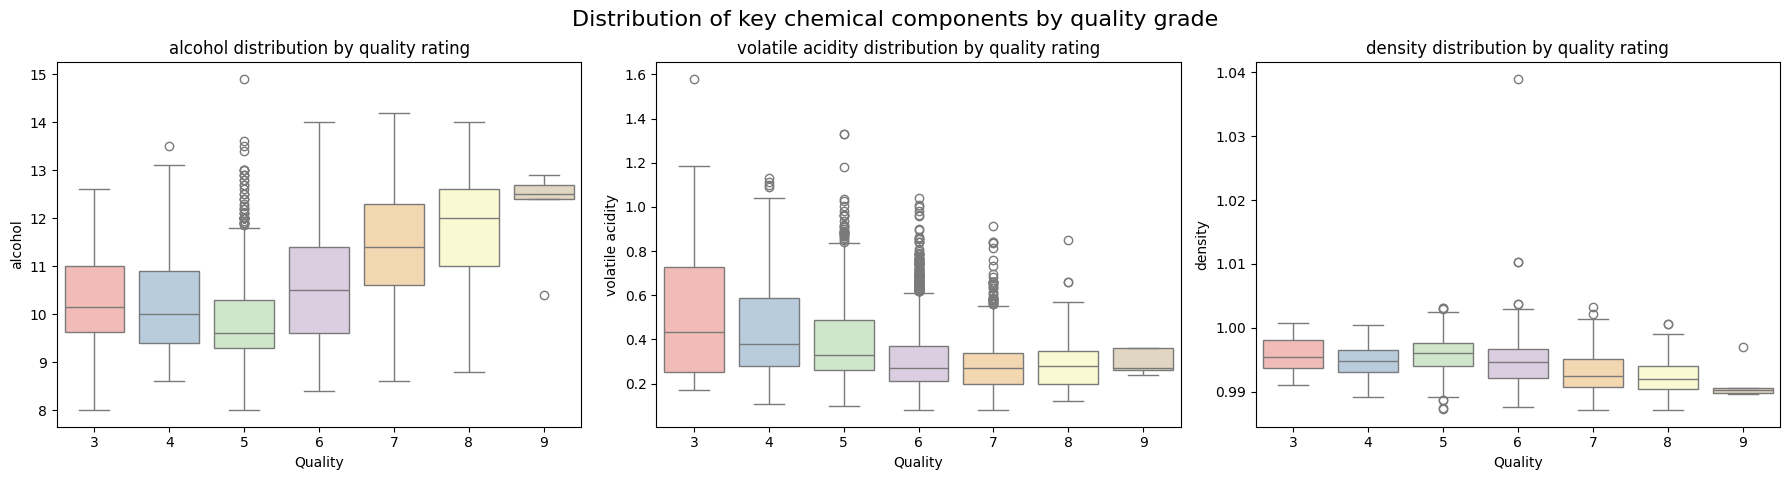

In [68]:
# 품질(quality)에 따른 주요 화학 성분 Box Plot
# 품질 예측에 중요한 변수들이 어떻게 품질 등급에 따라 변하는지 시각적으로 확인
major_cols = ['alcohol', 'volatile acidity', 'density']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes = axes.flatten()

for i, col in enumerate(major_cols):
    sns.boxplot(x='quality', y=col, data=train, ax=axes[i], palette='Pastel1')
    axes[i].set_title(f'{col} distribution by quality rating')
    axes[i].set_xlabel('Quality')
    axes[i].set_ylabel(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Distribution of key chemical components by quality grade', fontsize=16)
plt.show()

- alcohol : 양의 상관관계로, quality가 커질 때 alcohol도 커질 것으로 예상했으나, 중앙값은 3~5등급에서 오히려 낮아지는 경향 보임. 5등급의 이상치가 많고, 6,7,8 등급의 박스플롯 수염이 길어 절대적인 관계는 아닐 것으로 추정됨

- volatile acidity : 대체적으로 음의 선형관계에 맞는 모습 보임.
  휘발성 산도는 와인의 불쾌한 맛과 관련이 있어, 품질을 떨어뜨리는 주요 요인임을 보여줌.

- density : 6등급에 이상치 존재. 대체적으로 음의 상관관계 보임.  
품질이 좋은 와인은 알코올 도수가 높고 당분이 발효된 상태가 많으므로 품질이 좋을 수록 밀도가 낮아지는 경향 보임.

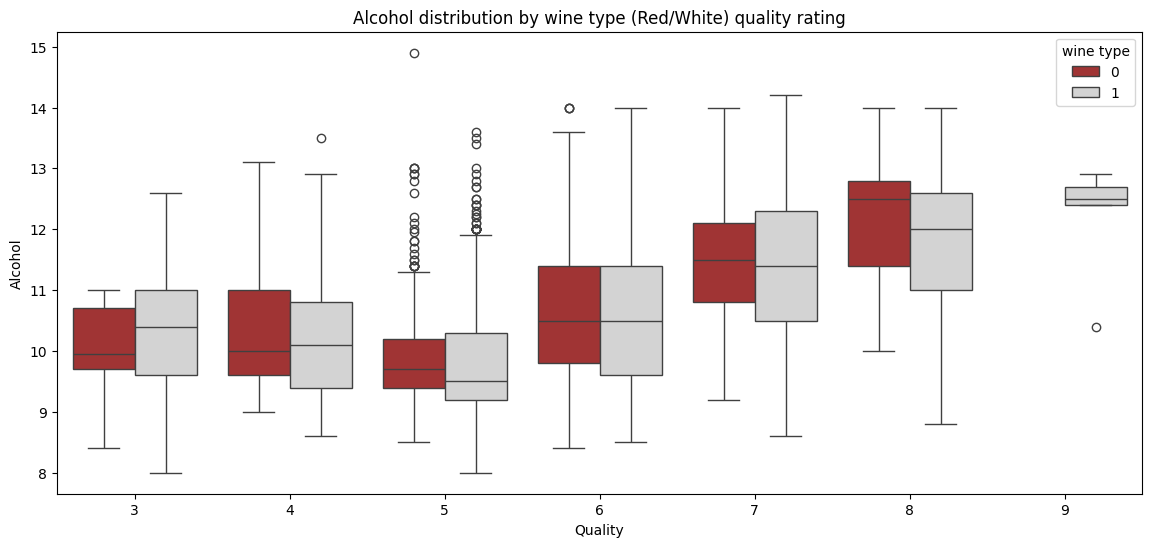

In [69]:
# 와인 유형(type)을 고려한 quality-alcohol 관계 분석
plt.figure(figsize=(14, 6))
sns.boxplot(x='quality', y='alcohol', hue='type', data=train, palette=['firebrick', 'lightgrey'])
plt.title('Alcohol distribution by wine type (Red/White) quality rating')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.legend(title='wine type')
plt.show()

대체적으로 레드와인과 화이트 와인의 박스 위치는 유사함. 5,6,7, 등급의 중앙값을 보면 레드 와인의 알코올이 약간 더 높은 편이며, 박스 길이도 더 길다.   


## Box-cox 변환

In [70]:
from scipy.stats import boxcox

# 왜도 1이상인 피처 리스트
highly_skewed_features = [
    'chlorides', 'sulphates', 'fixed acidity',
    'residual sugar', 'volatile acidity', 'free sulfur dioxide'
]

# 변환된 데이터를 저장할 데이터프레임 - 원본 복사해 사용.
train_transformed = train.copy()

# 변환 전/후의 왜도 값을 저장할 딕셔너리
skew_comparison = {}

# 각 피처에 Box-Cox 변환 적용
for feature in highly_skewed_features:
    # Box-Cox는 입력값이 0보다 커야 함
    # 와인 데이터의 화학 성분은 모두 양수이므로 별도의 처리 없이 진행 가능

    # 변환 함수 실행: .values를 사용하여 numpy 배열로 변환 후, 다시 Series로 저장
    transformed_data, lambda_value = boxcox(train_transformed[feature].values)

    # 원본 컬럼을 변환된 데이터로 대체
    train_transformed[feature] = transformed_data

    # 왜도 비교 데이터 저장
    skew_comparison[feature] = {
        'Original Skewness': skew(train[feature].dropna()),
        'Transformed Skewness': skew(train_transformed[feature].dropna()),
        'Lambda': lambda_value
    }

변환 전/후 왜도(Skewness) 비교
                    Original Skewness Transformed Skewness   Lambda
chlorides                      5.1859              -0.0590  -0.4772
sulphates                      1.9150              -0.0098  -0.4754
fixed acidity                  1.7104              -0.0627  -1.2620
residual sugar                 1.4985               0.0662  -0.1790
volatile acidity               1.4974               0.0110  -0.2824
free sulfur dioxide            1.3103              -0.0373   0.4601


/tmp/ipython-input-963005586.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(skew_df.applymap(lambda x: f"{x:.4f}"))


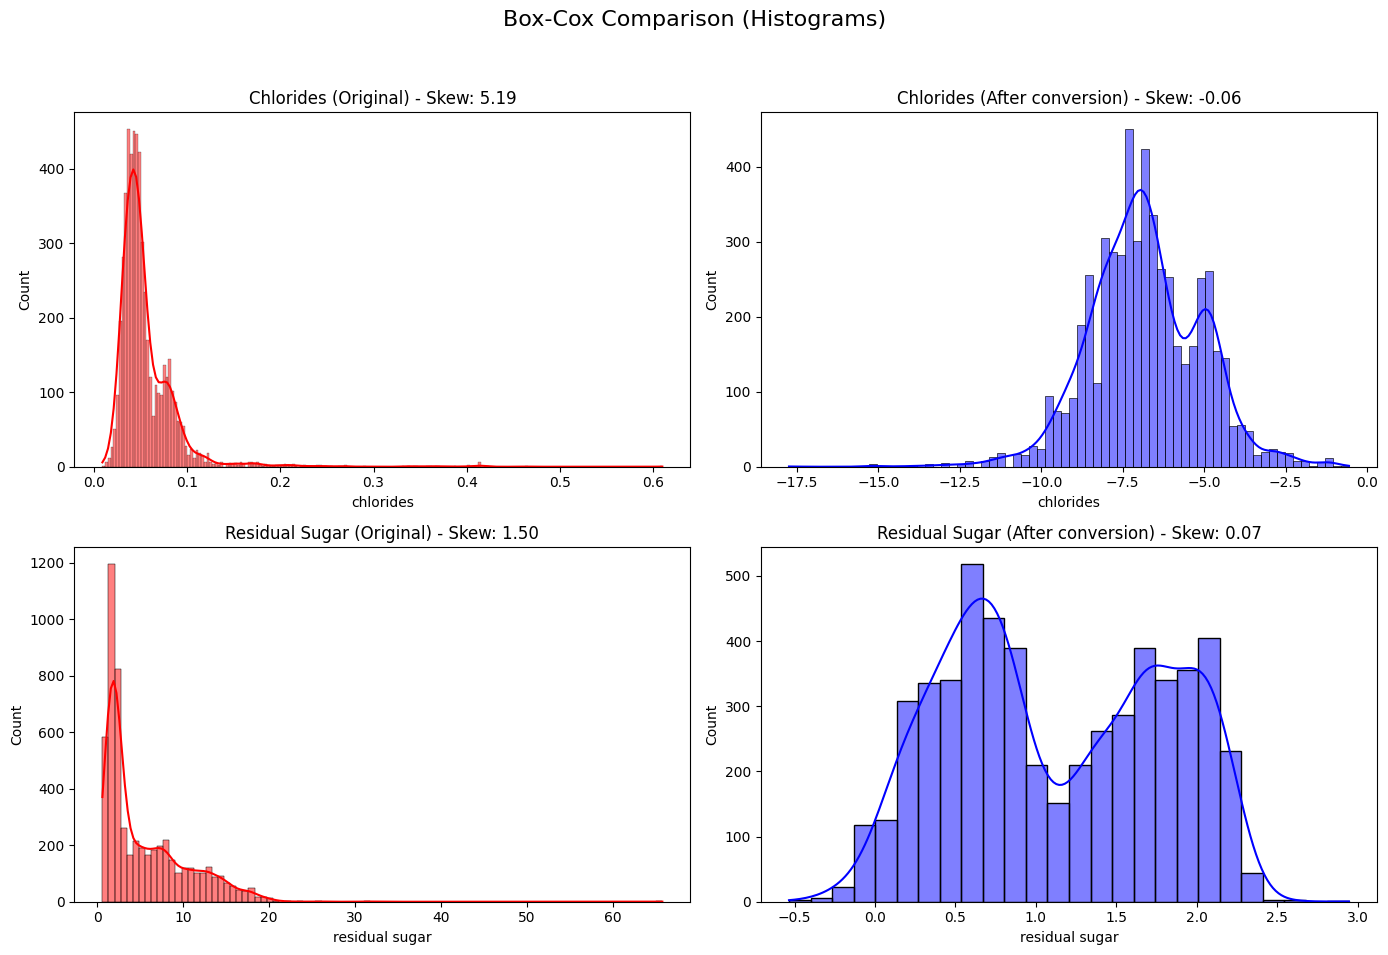

In [71]:
# 변환 결과 확인

# 왜도 비교 테이블 출력
skew_df = pd.DataFrame(skew_comparison).T
print("변환 전/후 왜도(Skewness) 비교")
print(skew_df.applymap(lambda x: f"{x:.4f}"))

# 변환 전/후 분포 시각화 (예시로 2개 피처만 확인함)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Box-Cox Comparison (Histograms)', fontsize=16)

# chlorides 변환 전후
sns.histplot(train['chlorides'], kde=True, ax=axes[0, 0], color='red')
axes[0, 0].set_title(f'Chlorides (Original) - Skew: {skew_df.loc["chlorides", "Original Skewness"]:.2f}')

sns.histplot(train_transformed['chlorides'], kde=True, ax=axes[0, 1], color='blue')
axes[0, 1].set_title(f'Chlorides (After conversion) - Skew: {skew_df.loc["chlorides", "Transformed Skewness"]:.2f}')


# residual sugar 변환 전후
sns.histplot(train['residual sugar'], kde=True, ax=axes[1, 0], color='red')
axes[1, 0].set_title(f'Residual Sugar (Original) - Skew: {skew_df.loc["residual sugar", "Original Skewness"]:.2f}')

sns.histplot(train_transformed['residual sugar'], kde=True, ax=axes[1, 1], color='blue')
axes[1, 1].set_title(f'Residual Sugar (After conversion) - Skew: {skew_df.loc["residual sugar", "Transformed Skewness"]:.2f}')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

왜도 절댓값이 많이 경감됨.
히스토그램을 통해 확인했을때도 분포가 고르게 변경됨.

## 표준화 스케일링

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# quality와 type을 제외하고 스케일링
scaling_features = train_transformed.columns.drop(['quality', 'type'])

scaler = StandardScaler()
train_transformed[scaling_features] = scaler.fit_transform(train_transformed[scaling_features])

print(train_transformed[scaling_features].describe().T.head())

                   count          mean       std       min       25%  \
fixed acidity     5497.0  5.050838e-16  1.000091 -5.991796 -0.614634   
volatile acidity  5497.0  1.021155e-16  1.000091 -3.707391 -0.625811   
citric acid       5497.0 -5.816704e-17  1.000091 -2.195474 -0.472414   
residual sugar    5497.0 -4.847254e-17  1.000091 -2.464523 -0.844756   
chlorides         5497.0 -2.055235e-16  1.000091 -6.352242 -0.613918   

                       50%       75%       max  
fixed acidity     0.003159  0.587906  3.330619  
volatile acidity -0.063856  0.657280  3.096407  
citric acid      -0.058879  0.492500  9.245647  
residual sugar   -0.193491  0.914376  2.694587  
chlorides        -0.053898  0.664719  3.648259  


In [76]:
# 피처 데이터 (X)와 타겟 데이터 (Y) 분리
X = train_transformed.drop('quality', axis=1)
y = train_transformed['quality']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    shuffle=True,
    stratify=y
)

# **결정 트리**

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from collections import Counter
from sklearn.metrics import f1_score

 DecisionTreeClassifier의 최적의 매개변수를 찾기 위해 교차 검증과 함께 그리드 탐색을 수행함. (GridSearchCV)

In [78]:
dt_clf = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced' # 불균형 클래스이므로, 클래스 불균형 해소 역할
)

# 하이퍼 파라미터 설정.
params = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 3, 4],
    'max_leaf_nodes': [10, 30, 50, 80]
}

# GridSearchCV 설정 및 학습
grid_search_cv = GridSearchCV(
    estimator=dt_clf,
    param_grid=params,
    cv=5,
    scoring='f1_weighted', # 가중 F1-Score를 최대화하도록 최적화
    n_jobs=-1,             # 가능한 모든 CPU 코어 사용
    verbose=1              # 진행 과정 출력
)


# 모델 학습
grid_search_cv.fit(X_train, y_train)

# 최적의 매개변수 확인
best_params = grid_search_cv.best_params_
best_dt_clf = grid_search_cv.best_estimator_

y_pred = best_dt_clf.predict(X_test)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [79]:
test_f1_weighted = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# 결정 트리 모델 test set 평가
print(f'최적 하이퍼 파라미터 : {best_params}')
print(f'최적 파라미터로 계산한 테스트 세트 F1-Score (가중 평균): {test_f1_weighted:.4f}')

최적 하이퍼 파라미터 : {'max_depth': 9, 'max_leaf_nodes': 80, 'min_samples_split': 4}
최적 파라미터로 계산한 테스트 세트 F1-Score (가중 평균): 0.4145


불균형 데이터이므로, scoring에 'accuracy' 보다 'f1_weighted'를 사용함

F1 score가 0.4145로 아주 낮음.  
<원인 분석>
- 클래스 불균형: 데이터 자체에서 5,6등급 와인이 전체의 76.47%를 차지함. 특히 3,9등급 와인은 샘플 수가 매우 적음. 3,4,8,9등급의 와인은 샘플수가 부족하여 모델이  효과적으로 학습하기 어려웠을 것으로 예상됨.
- 클래스 경계 모호함 : 5, 6등급의 화학 성분의 분포가 크게 다르지 않아 결정트리 분할 경계가 명확하지 않을 것으로 생각됨.

<개선 방안>
- Grid Search 파라미터 튜닝 범위 확장

In [80]:
# 하이퍼 파라미터 범위 확장
params = {
    'max_depth': [3, 5, 7, 9, 11, 13],  # 더 깊은 트리를 탐색 (복잡한 경계 학습 시도)
    'min_samples_split': [2, 4, 6], # 분할 최소 샘플 수 조절
    'max_leaf_nodes': list(range(2,100)), # 리프 노드 수 조절
    'min_samples_leaf': [10, 20, 30, 40]  # 일반화 능력 개선에 핵심
}

# GridSearchCV 설정 및 학습
grid_search_cv = GridSearchCV(
    estimator=dt_clf,
    param_grid=params,
    cv=5,
    scoring='f1_weighted', # 가중 F1-Score를 최대화하도록 최적화
    n_jobs=-1,             # 가능한 모든 CPU 코어 사용
    verbose=1              # 진행 과정 출력
)


# 모델 학습
grid_search_cv.fit(X_train, y_train)

# 최적의 매개변수 확인
best_params = grid_search_cv.best_params_
best_dt_clf = grid_search_cv.best_estimator_

y_pred = best_dt_clf.predict(X_test)

Fitting 5 folds for each of 7056 candidates, totalling 35280 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [81]:
test_f1_weighted = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# 결정 트리 모델 test set 평가
print(f'수정된 최적 하이퍼 파라미터 : {best_params}')
print(f'수정된 최적 파라미터로 계산한 테스트 세트 F1-Score (가중 평균): {test_f1_weighted:.4f}')

수정된 최적 하이퍼 파라미터 : {'max_depth': 9, 'max_leaf_nodes': 99, 'min_samples_leaf': 10, 'min_samples_split': 2}
수정된 최적 파라미터로 계산한 테스트 세트 F1-Score (가중 평균): 0.3915


하이퍼 파라미터 범위 수정을 통해 F1-score가 0.4145에서 0.4853으로 약 0.07 이상의 성능 향상을 달성했음.  
파라미터의 형태를 다양하게 바꿔가며 시도했고, 최적 하이퍼 파라미터 수치를 살펴보며 해당 범위에 속하는 값들을 분할해가며 모델링 진행하고 비교해봄. 학회 예제(1017_연습문제_분류)에서 사용했던 파라미터를 참고하여 'max_leaf_nodes'인자를 내가 지정하지 않고, list(range(2,100))로 입력하여 넓은 범위 내에서 최적 하이퍼 파라미터를 찾을 수 있도록 한 것이 가장 유의미한 성능 향상을 이끌어냈음.

<결정트리 모델링 결과와 한계>  
하이퍼 파라미터를 조정해가며 여러차례 시도해보았으나, 불균 특성을 가지는 데이터를 이용해 결정 트리 모델에서 높은 f1-score 결과를 얻기 어려웠다. 일반적으로 결정 트리 모델에서 파라미터 튜닝을 거쳐도 F1-score가 0.45~0.50 이상으로 오르지 않는 한계에 도달할 수 있다고 한다. 결정 트리 모델은 데이터를 오직 수직선과 수평선으로 분할한다. 와인 품질에는 여러 성분이 복합적으로 작용할 것으로 예상되므로, 대각선 형태의
경계가 있을 때 결정트리 모델링에서는 노이즈와 오류가 커질 수 있다.

화학 성분 간의 상호작용과 불균형을 해결하기 위해 Random Foreset나 LightGBM 모델을 이용해 결정트리의 약점을 보완할 필요성이 있다.

# 데이터 예측

In [82]:
submit = pd.read_csv('sample_submission.csv')
submit.head()

,index,quality
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [83]:
# test 데이터 스케일링
scaling_features = test.columns.drop(['type'])
test_transformed = test.copy() # 원본 test_df를 복사하여 전처리
test_transformed[scaling_features] = scaler.transform(test_transformed[scaling_features])

In [84]:
# 최종 예측

# 학습
final_dt_clf = DecisionTreeClassifier(random_state=42,
                                      max_depth=11,
                                      min_samples_split= 2,
                                      max_leaf_nodes=52,
                                      min_samples_leaf= 10
)
final_dt_clf.fit(X, y)

X_final_test = test_transformed
test_pred = final_dt_clf.predict(X_final_test)

In [85]:
submit['quality'] = test_pred

In [86]:
submit.head()

,index,quality
0,0,6
1,1,5
2,2,5
3,3,5
4,4,6


In [87]:
submit.to_csv('submission_1107.csv',index=False)

점수 0.381

#**랜덤포레스트**

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [89]:
X = train.drop(['quality'], axis=1)
y = train['quality']

##기본 모델 생성

In [90]:
rf=RandomForestClassifier(random_state=156)
rf.fit(X,y)
y_pred_rf=rf.predict(test)

In [91]:
smpl_sub['quality'] = y_pred_rf

In [92]:
smpl_sub.to_csv('wine_submission.csv', index=False)

##GridSearchCV로 하이퍼파라미터 튜닝 후 비교

In [93]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 후보 설정
param_grid = {
    'n_estimators': [100, 200, 300],        # 트리 개수
    'max_depth': [None, 10, 20, 30],        # 최대 깊이
    'min_samples_split': [2, 5, 10],        # 분할 최소 샘플 수
    'min_samples_leaf': [1, 2, 4],          # 리프 노드 최소 샘플 수
    'max_features': ['sqrt', 'log2']        # 피처 선택 방식
}

# GridSearchCV 설정 (5-폴드 교차검증)
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid,
    cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

grid_rf.fit(X, y)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=156),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [94]:
print("최적 하이퍼파라미터:\n", grid_rf.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_rf.best_score_))

최적 하이퍼파라미터:
 {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
최고 예측 정확도: 0.6795


In [95]:
# RF (GridSearch 튜닝) 최종 예측
rf_clf = RandomForestClassifier(
    max_depth=20,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=300,
    random_state=156
)

# 학습
rf_clf.fit(X, y)

# 예측
y_pred_rf = rf_clf.predict(test)

In [96]:
smpl_sub['quality'] = y_pred_rf
smpl_sub.to_csv('wine_submission.csv', index=False)

점수: 0.687

##피처 Importance 확인, 시각화

In [100]:
best_rf = grid_rf.best_estimator_

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 피처 중요도 추출 (GridSearch로 찾은 최적 모델 사용)
feature_importances = pd.Series(best_rf.feature_importances_, index=X.columns)

# 중요도 순으로 정렬
feature_importances = feature_importances.sort_values(ascending=False)

print("상위 10개 중요 피처:\n", feature_importances.head(10))

상위 10개 중요 피처:
 alcohol                 0.130734
density                 0.102781
volatile acidity        0.102420
total sulfur dioxide    0.089462
chlorides               0.087092
sulphates               0.086121
residual sugar          0.083758
free sulfur dioxide     0.083508
pH                      0.080618
citric acid             0.076849
dtype: float64


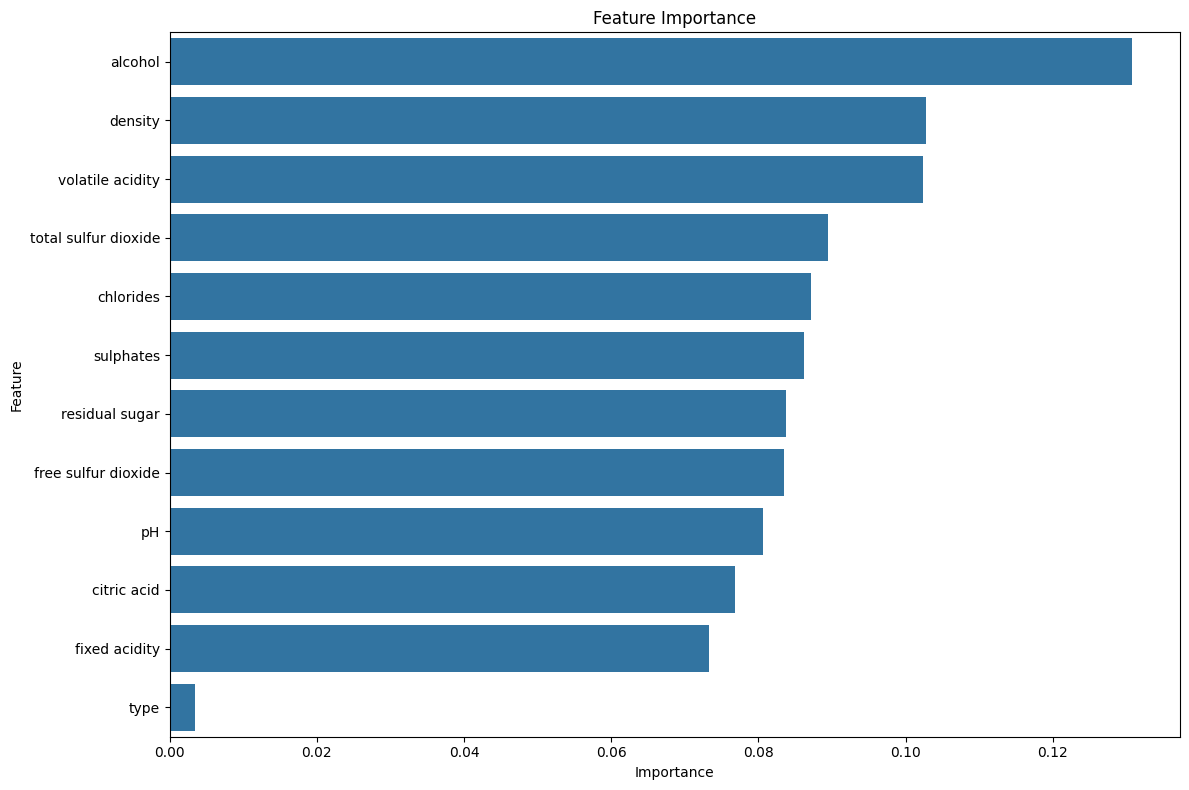

In [109]:
# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# **LightGBM**

In [103]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

- 데이터 분리

In [104]:
X = train.drop(columns=['quality'])
y = train['quality']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [105]:
from sklearn.metrics import accuracy_score, classification_report, f1_score

model = LGBMClassifier(random_state=42)
model.fit(X_train, y_train)

# 검증 데이터 예측 및 평가
y_pred = model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1481
[LightGBM] [Info] Number of data points in the train set: 4397, number of used features: 12
[LightGBM] [Info] Start training from score -5.344155
[LightGBM] [Info] Start training from score -3.384731
[LightGBM] [Info] Start training from score -1.123248
[LightGBM] [Info] Start training from score -0.822367
[LightGBM] [Info] Start training from score -1.783380
[LightGBM] [Info] Start training from score -3.584657
[LightGBM] [Info] Start training from score -7.002383
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


- GridSearchCV를 사용한 하이퍼 파라미터 튜닝

In [106]:
from sklearn.model_selection import StratifiedKFold

print("하이퍼파라미터 튜닝(GridSearchCV)")

param_grid = {
    'n_estimators': [100, 300],
    'learning_rate': [0.01, 0.05],
    'num_leaves': [31, 63],
    'max_depth': [8, -1]
}
lgbm = LGBMClassifier(
    class_weight='balanced',  # 불균형 클래스에 가중치 부여
    random_state=42,
    n_jobs=-1
)

#레이블 불균형 문제를 해결하기 위한 데이터 분할 기법
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid,
                           scoring='f1_macro', cv=3, verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

model_tuned = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"최적 하이퍼파라미터 (Best Params): {best_params}")
print(f"최적 F1-Macro Score (CV): {best_score:.4f}")

하이퍼파라미터 튜닝(GridSearchCV)
Fitting 3 folds for each of 16 candidates, totalling 48 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000650 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1481
[LightGBM] [Info] Number of data points in the train set: 4397, number of used features: 12
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

In [110]:
y_pred_lgbm = model_tuned.predict(test)

In [111]:
smpl_sub['quality'] = y_pred_lgbm

smpl_sub.to_csv('wine_submission_lgbm.csv', index=False)

점수 : 0.662

- 피처 importance 시각화

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

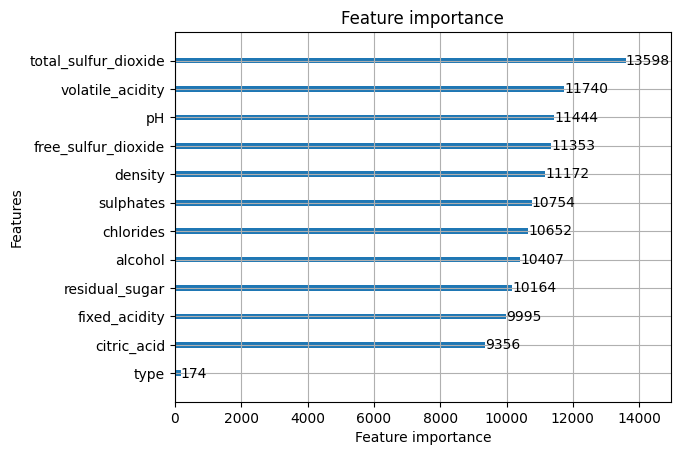

In [112]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt

model_tuned = grid_search.best_estimator_

plot_importance(model_tuned)

# **XGBoost**

In [114]:
from xgboost import XGBClassifier

In [115]:
# 라벨 인코딩
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)

# train/val split도 인코딩된 y로
X_train, X_val, y_train, y_val = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

# 기본 XGBoost 모델
basic_xgb = XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y_encoded)),
    eval_metric='mlogloss',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=1.0,
    colsample_bytree=1.0,
    random_state=42,
    use_label_encoder=False
)

basic_xgb.fit(X_train, y_train)

# 예측
y_pred_basic_encoded = basic_xgb.predict(X_val)

# 복원
y_pred_basic = le_y.inverse_transform(y_pred_basic_encoded)
y_val_original = le_y.inverse_transform(y_val)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:00:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [118]:
from sklearn.model_selection import GridSearchCV

# 1. 라벨 인코딩
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)

# 2. 반드시 인코딩된 y로 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

# 3. 모델 정의
xgb_clf = XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y_encoded)),
    eval_metric='mlogloss',
    random_state=42,
    use_label_encoder=False
)

# 4. GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_
y_pred_encoded = best_xgb.predict(X_test)

# 5. inverse transform
y_pred = le_y.inverse_transform(y_pred_encoded)
y_test_original = le_y.inverse_transform(y_test)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:13:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


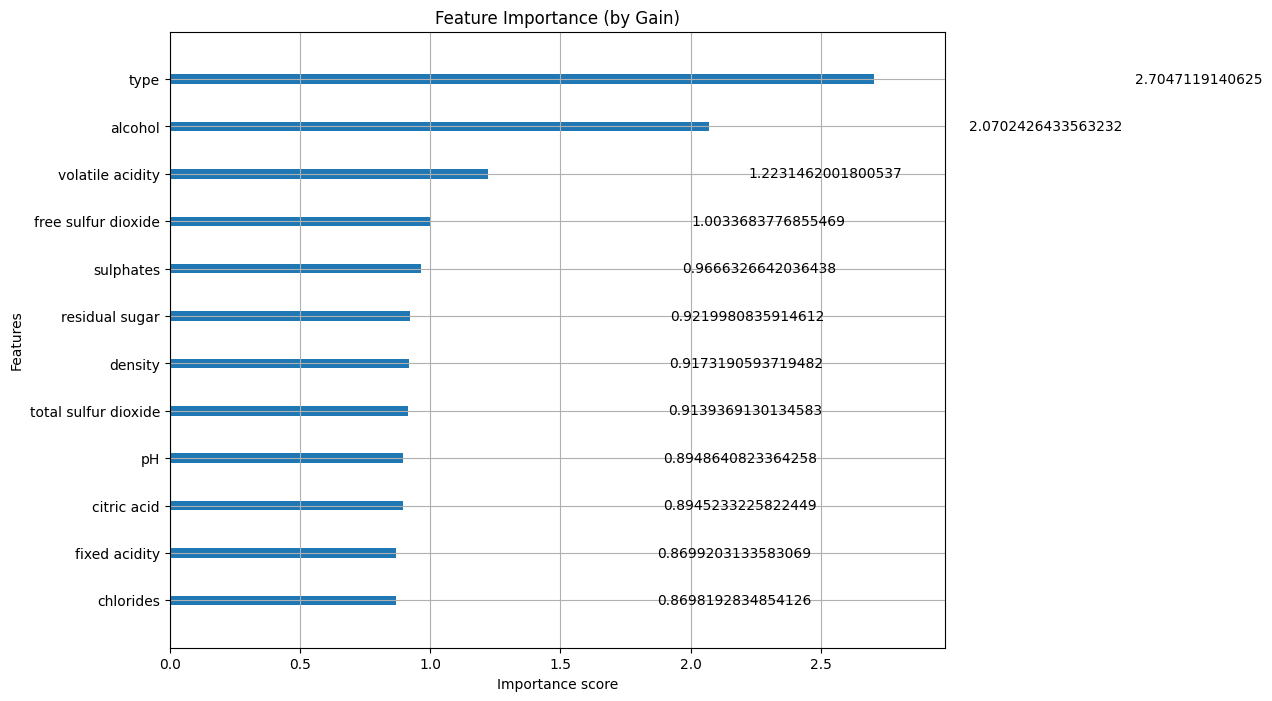

In [119]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
plot_importance(
    best_xgb,
    ax=ax,
    importance_type='gain',
    title='Feature Importance (by Gain)'
)
plt.show()

## 데이터 예측

In [137]:
submit = pd.read_csv('sample_submission.csv')
submit.head()

,index,quality
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [138]:
# test 데이터 스케일링
scaling_features = test.columns.drop(['type'])
test_transformed = test.copy() # 원본 test_df를 복사하여 전처리
test_transformed[scaling_features] = scaler.transform(test_transformed[scaling_features])

In [139]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)

final_dt_clf = XGBClassifier(
    random_state=42,
    max_depth=7,
    learning_rate=0.05,
    n_estimators=300,
    colsample_bytree=0.8,
    subsample=0.8,
    objective='multi:softmax',  # <--- 이진 분류가 아닌 '다중 분류'로 변경
    num_class=len(np.unique(y_encoded)), # <--- 클래스 개수(7) 명시
    eval_metric='mlogloss',
    use_label_encoder=False    # LabelEncoder를 직접 사용했으므로 False
)
final_dt_clf.fit(X, y_encoded)

# 최종 예측
X_final_test = test_transformed
test_pred_encoded = final_dt_clf.predict(X_final_test)

test_pred = le_y.inverse_transform(test_pred_encoded)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:36:23] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [140]:
submit['quality'] = test_pred

In [141]:
submit.head()

,index,quality
0,0,6
1,1,6
2,2,3
3,3,6
4,4,3


In [142]:
submit.to_csv('submission_xgb.csv',index=False)

점수 : 0.436